
### **Ecuación de la dilatación lineal**

Si un cuerpo de longitud inicial $ L_0$  a una temperatura $ T_0 $ se calienta o enfría hasta una temperatura $T $, su longitud final $ L  viene dada por:

$$
L = L_0 (1 + \alpha \Delta T)
$$

donde:

* $ L_0 $: longitud inicial
* $ \alpha $: **coeficiente de dilatación lineal** del material (depende del tipo de material)
* $ \Delta T = T - T_0 $: cambio de temperatura
* $ L $: longitud final

---

### **Cambio de longitud**

La variación de longitud se expresa como:

$$
\Delta L = L - L_0 = \alpha L_0 \Delta T
$$

---

###  **Coeficiente de dilatación lineal $\alpha$ **

El valor de ( \alpha ) depende del material y se mide en ( 1/°C ) o ( 1/K ).
Algunos valores típicos:

| Material               | ( \alpha ) (1/°C) ×10⁻⁶ |
| ---------------------- | ----------------------- |
| Aluminio               | 23                      |
| Cobre                  | 17                      |
| Hierro                 | 12                      |
| Vidrio                 | 9                       |
| Invar (aleación Fe-Ni) | 1.2                     |


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

L0 ajustado: 0.299973 m
α ajustado: 23.751 ×10⁻⁶ /°C


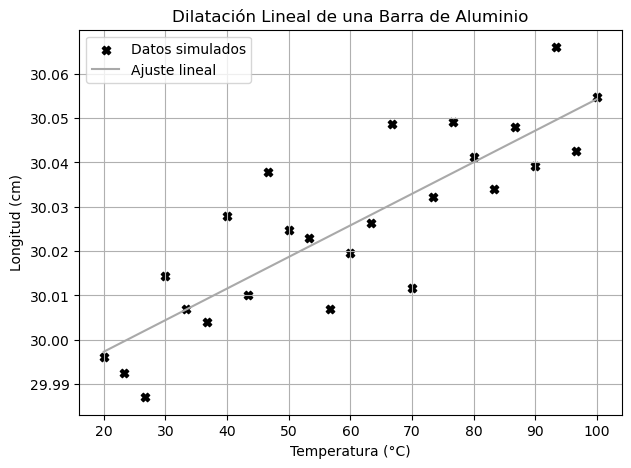

In [1]:
# Parámetros reales (modelo físico)
L0 = 0.30        # metros (30 cm)
alpha_real = 23e-6  # coeficiente real del aluminio (1/°C)
T0 = 20.0         # temperatura inicial (°C)

# Datos simulados
T =np.linspace(20,100,25) # temperaturas medidas
L_true = L0 * (1 + alpha_real * (T - T0))  # longitud teórica
ruido = np.random.normal(0, 0.0001, size = T.size)  # ruido ±0.1 mm
L_measured = L_true+ruido

# Definimos la función a ajustar
def dilatacion_lineal(T, L0_fit, alpha_fit):
    return L0_fit * (1 + alpha_fit * (T - T0))

# Ajuste con curve_fit
popt, pcov = curve_fit(dilatacion_lineal, T, L_measured, p0=[L0, 20e-6])
L0_fit, alpha_fit = popt

L_fit = dilatacion_lineal(T, L0_fit, alpha_fit)

# Resultados
print(f"L0 ajustado: {L0_fit:.6f} m")
print(f"α ajustado: {alpha_fit*1e6:.3f} ×10⁻⁶ /°C")

# Gráfica
plt.figure(figsize=(7,5))
plt.scatter(T, L_measured*100, color='black', label='Datos simulados', marker = 'X')
plt.plot(T, L_fit*100, color='darkgrey', label='Ajuste lineal')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Longitud (cm)')
plt.title('Dilatación Lineal de una Barra de Aluminio')
plt.legend()
plt.grid(True)
plt.show()

## Intervalos de confianza y de predicción al 95%

Una vez ajustado el modelo de **regresión lineal** que describe la relación entre la temperatura y la longitud del material, se calculan dos tipos de intervalos estadísticos: el **intervalo de confianza del 95%** y el **intervalo de predicción del 95%**. 

### Intervalo de confianza del 95%

El **intervalo de confianza del 95%** (región sombreada interna) representa la incertidumbre asociada a la **estimación de la media** de la longitud para cada valor de temperatura, de acuerdo con el modelo de regresión lineal obtenido.

En términos prácticos, este intervalo indica que, si el experimento se repitiera un gran número de veces, el **95% de los intervalos de confianza calculados contendrían el valor verdadero de la longitud media** para una temperatura dada.


### Intervalo de predicción del 95%

El **intervalo de predicción del 95%** (región sombreada externa) indica el rango en el cual se espera que caiga **una medición individual futura** de la longitud para un valor específico de la temperatura, con un nivel de confianza del 95%.

Para una discusión más detallada sobre la construcción e interpretación de intervalos de confianza e intervalos de predicción en modelos de regresión lineal, puede consultarse la referencia clásica J. L. Devore, Probability and Statistics for Engineering and the Sciences.



m =  7.124544289387224e-06 alpha=  2.3748480964624082e-05 L_0=  0.2999731481516821
std=  0.00010815444075793165
s=  0.00011275879921155362
Desviaciond de la pendiente =  9.3820992073155e-07
sXX =  14444.444444444445
std_err: 0.000
Pendiente:  0.00
Intercepto:  0.30
R-squared:  0.714871006925513
t_val=   2.10092204024096


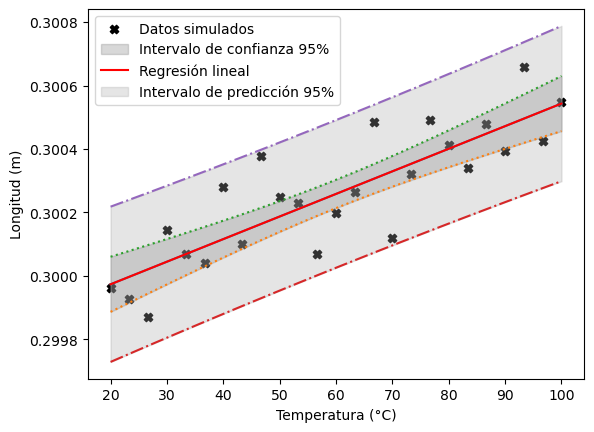

In [4]:
plt.scatter(T, L_measured, marker = 'X', c = 'black', label='Datos simulados')

n = len(T) # Numero de Datos

m, b = np.polyfit(T, L_measured, 1) # Ajuste lineal usando polyfit
print('m = ', m, 'alpha= ', m/0.3, 'L_0= ', b+ m*20 )
X  = np.linspace( min(T), max(T), 100)
Y  = m*X+ b 

Residuos =  -(m*np.array(T)+ b) + np.array(L_measured)
std = np.std(Residuos)
s = np.sqrt(np.sum((-(m*np.array(T)+ b) + np.array(L_measured))**2)/(n-2))
print('std= ', np.std(Residuos))
print('s= ', s)
plt.plot(X,Y)

sXX = np.sum((T - np.mean(T))**2)
print('Desviaciond de la pendiente = ',np.sqrt(s**2/sXX))
print('sXX = ', sXX)

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(T, L_measured)
print("std_err:", f'{std_err:.3f}')
print("Pendiente: ", f'{slope:.2f}')
print("Intercepto: ", f'{intercept:.2f}')
print("R-squared: ", r_value**2)


# t crítico para 95% de confianza
t_val = stats.t.ppf(0.975, df=n-2)

SE_Y = std * np.sqrt((1/n) + (X - np.mean(T))**2/sXX)
#print('SE_Y=', SE_Y)

# Intervalos de confianza
CI_upper = Y + t_val * SE_Y
CI_lower = Y - t_val * SE_Y

n = 20
# Graficar
plt.plot(X, CI_lower, ls = ':')
plt.plot(X, CI_upper, ls = ':')
plt.fill_between(X, CI_lower, CI_upper, color='grey', alpha=0.3, label='Intervalo de confianza 95%')

SE_pred = std * np.sqrt(1 + (1/n) + (X - np.mean(T))**2/sXX)


# t crítico para 95% de confianza
t_val = stats.t.ppf(0.975, df=n-2)
print('t_val=  ', t_val)

# Intervalos de predicción
PI_upper = Y + t_val * SE_pred
PI_lower = Y - t_val * SE_pred

# Graficar
plt.plot(X, PI_lower, ls = '-.')
plt.plot(X, PI_upper, ls = '-.')
plt.plot(X, Y, 'r', label='Regresión lineal')
plt.fill_between(X, PI_lower, PI_upper, color='darkgrey', alpha=0.3, label='Intervalo de predicción 95%')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Longitud (m)')


plt.legend()
plt.show()